<font size="3">Diabetes Prediction Project Documentation

Introduction

Diabetes is a chronic disease and a significant public health issue worldwide that results from high blood sugar levels in the body. This condition can lead to serious complications, including heart problems, blindness, and kidney failure. Therefore, early detection and prevention of diabetes can have a substantial impact on patients' quality of life.
The aim of this project is to create a machine learning model for predicting the likelihood of individuals developing diabetes based on their health-related features. Utilizing a dataset that includes factors such as age, body mass index (BMI), blood sugar levels, and blood pressure, we seek to identify critical drivers of diabetes onset.
Through data analysis and the application of machine learning algorithms, this project aims to develop a tool that assists healthcare providers in identifying patients at high risk for diabetes early on, allowing for timely preventive measures.

Project Objectives

Understand the key factors contributing to diabetes onset.
Build a predictive model to assess the likelihood of diabetes.
Evaluate the accuracy and effectiveness of the developed model.</font>

<font size="3">Importing Required Libraries

In this section, we import the necessary libraries for data handling, visualization, preprocessing, and building the deep learning model.</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import LocalOutlierFactor
from catboost import CatBoostClassifier
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
import pickle

<font size="3">Loading and Exploring the Dataset

We load the dataset and check its structure. This helps us understand what kind of data we are working with.</font>

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<font size="3">Exploratory Data Analysis (EDA)

In this section, we check the basic structure of the dataset and look for missing values or abnormal data.</font>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.duplicated().sum()

0

In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<font size="3">This histogram illustrates the distribution of ages among individuals in the diabetes dataset. The x-axis represents the age of the individuals, while the y-axis shows the frequency of individuals within each age interval. The kernel density estimation (KDE) overlay provides insights into the underlying probability distribution of the age data</font>

<Axes: xlabel='Age', ylabel='Count'>

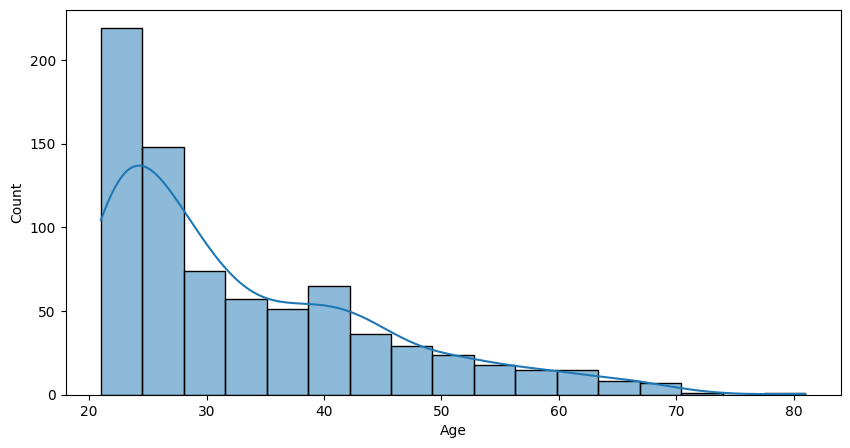

In [7]:
plt.figure(figsize=(10,5))
sns.histplot(data['Age'] , kde=True)


In [8]:
# filling the missing values of age
age_mean = data[data['Age'] != 0 ]['Age'].mean
skin_mean = data[data['SkinThickness'] != 0 ]['SkinThickness'].mean()
data['SkinThickness'].replace(0 , skin_mean , inplace = True)

<font size="3">This histogram illustrates the distribution of skin thickness measurements in individuals from the diabetes dataset. The x-axis represents the skin thickness in millimeters (mm), while the y-axis indicates the frequency of individuals within each skin thickness range. The kernel density estimation (KDE) overlay helps in understanding the underlying distribution of skin thickness data.</font>

<Axes: xlabel='SkinThickness', ylabel='Count'>

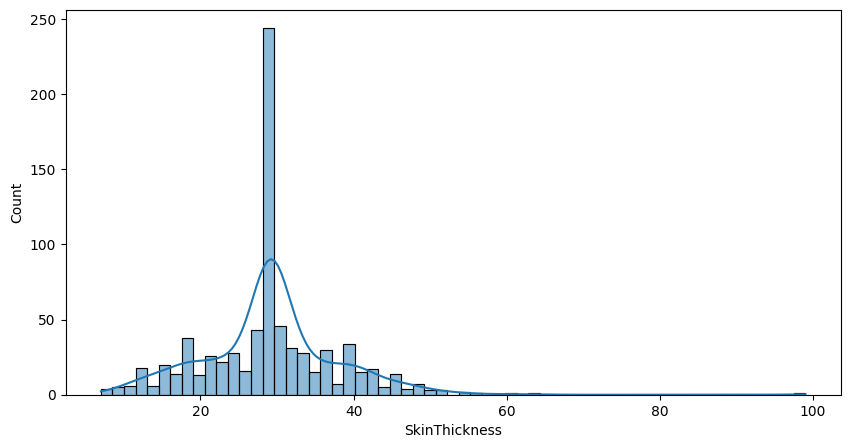

In [9]:
plt.figure(figsize=(10,5))
sns.histplot(data['SkinThickness'] , kde=True)

In [10]:
# filling the missing values of Insulin
insulin_mean = data[data['Insulin'] != 0]['Insulin'].mean()
data['Insulin'].replace(0, insulin_mean, inplace=True)

<font size="3">This histogram illustrates the distribution of insulin levels measured in individuals from the diabetes dataset. The x-axis represents the insulin levels in micro-units per milliliter (µU/mL), while the y-axis indicates the frequency of individuals within each insulin level range. The kernel density estimation (KDE) overlay aids in visualizing the underlying distribution of the insulin data.</font>

<Axes: xlabel='Insulin', ylabel='Count'>

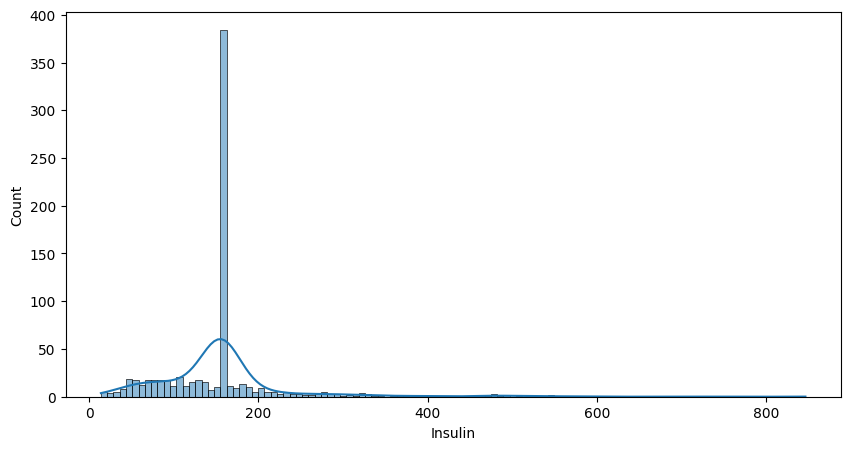

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(data['Insulin'] , kde=True)

In [12]:
# filling the missing values of Glucose
glucose_mean = data[data['Glucose'] != 0]['Glucose'].mean()
data['Glucose'].replace(0, glucose_mean, inplace=True)

<font size="3">This histogram illustrates the distribution of glucose levels measured in individuals from the diabetes dataset. The x-axis represents the glucose levels in milligrams per deciliter (mg/dL), while the y-axis indicates the frequency of individuals within each glucose level range. The kernel density estimation (KDE) overlay assists in visualizing the underlying distribution of the glucose data.</font>

<Axes: xlabel='Glucose', ylabel='Count'>

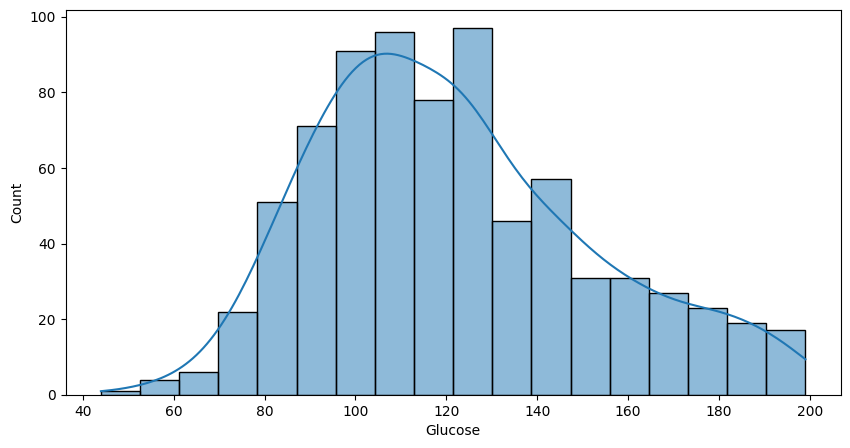

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(data['Glucose'] , kde=True)

In [14]:
# filling the missing values of BloodPressure
bloodpressure_mean = data[data['BloodPressure'] != 0]['BloodPressure'].mean()
data['BloodPressure'].replace(0, bloodpressure_mean, inplace=True)

<font size="3">This histogram illustrates the distribution of blood pressure levels measured in individuals from the diabetes dataset. The x-axis represents the blood pressure levels in millimeters of mercury (mmHg), while the y-axis indicates the frequency of individuals within each blood pressure range. The kernel density estimation (KDE) overlay assists in visualizing the underlying distribution of the blood pressure data.</font>

<Axes: xlabel='BloodPressure', ylabel='Count'>

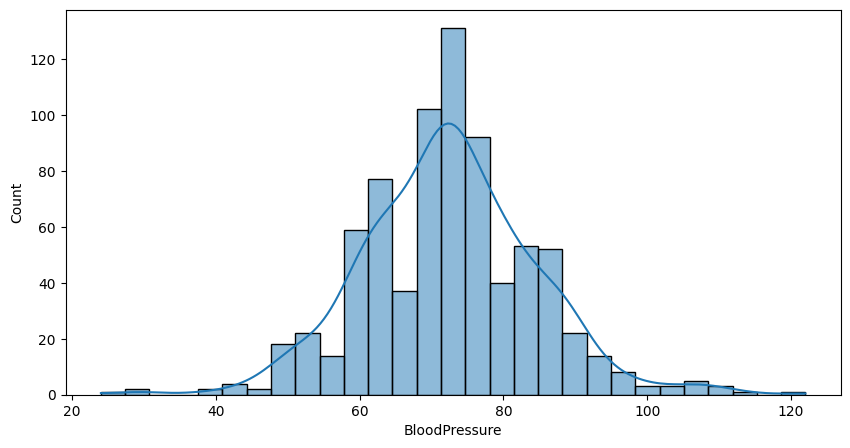

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(data['BloodPressure'] , kde=True)

In [16]:
# filling the missing values of BMI
bmi_mean = data[data['BMI'] != 0]['BMI'].mean()
data['BMI'].replace(0, bmi_mean, inplace=True) 

<font size="4">This histogram illustrates the distribution of body mass index (BMI) values measured in individuals from the diabetes dataset. The x-axis represents the BMI values, while the y-axis indicates the frequency of individuals within each BMI range. The kernel density estimation (KDE) overlay assists in visualizing the underlying distribution of the BMI data.</font>

<Axes: xlabel='BMI', ylabel='Count'>

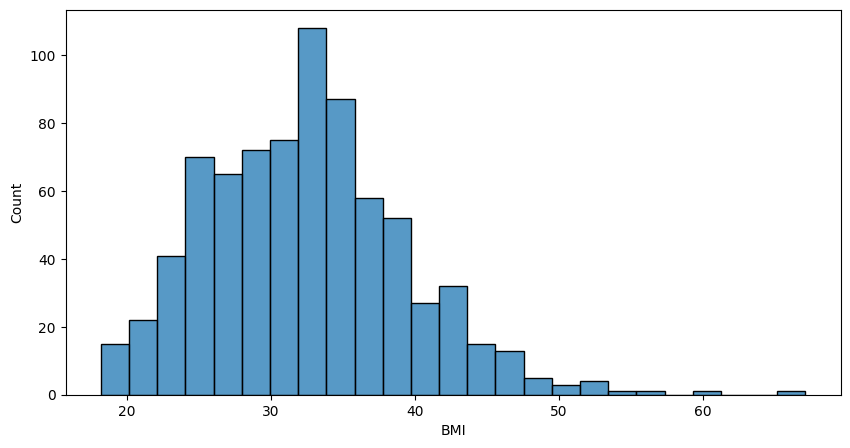

In [17]:
# histplot on BMI
plt.figure(figsize=(10,5))
sns.histplot(data['BMI'])

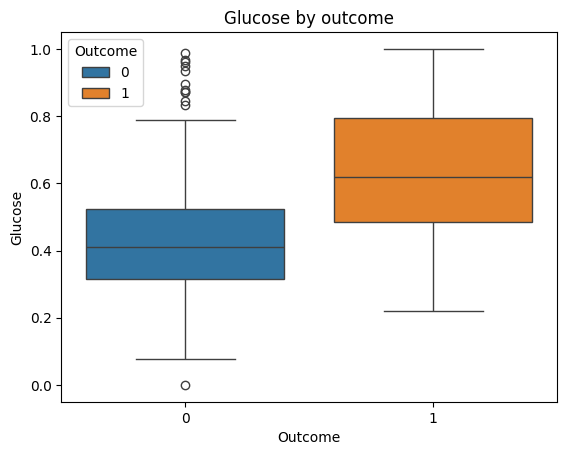

In [56]:
sns.boxplot(x='Outcome', y='Glucose', data=data , hue='Outcome')
plt.title('Glucose by outcome')
plt.show()

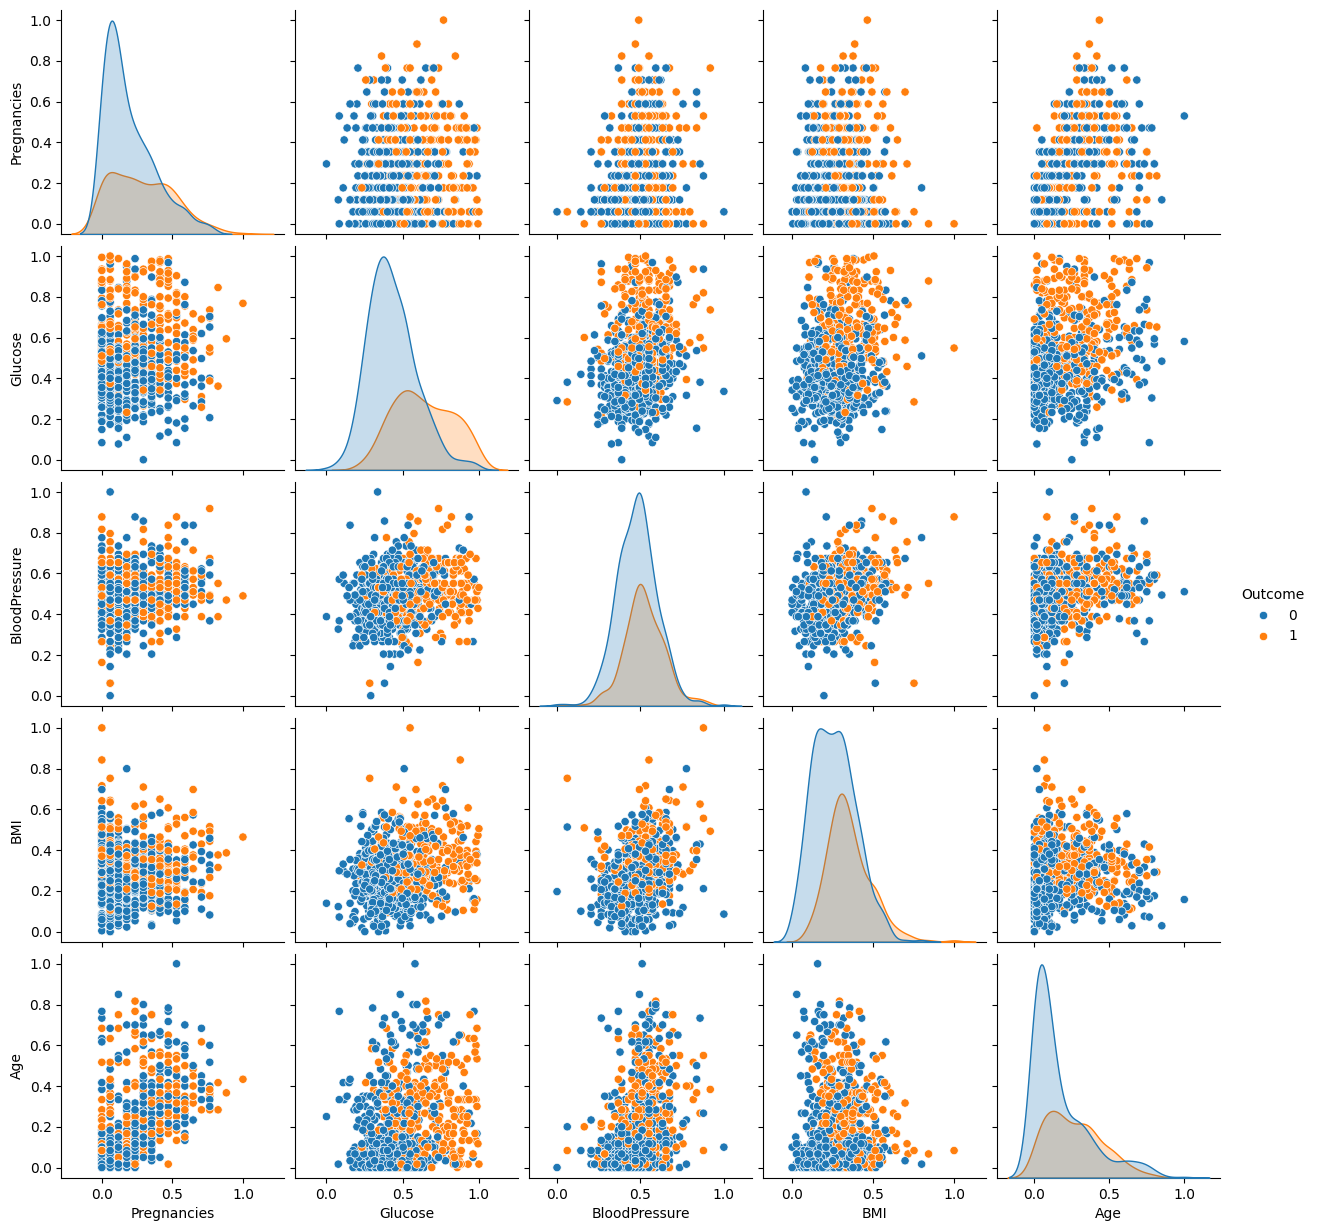

In [50]:
sns.pairplot(data[['Pregnancies' , 'Glucose', 'BloodPressure', 'BMI', 'Age', 'Outcome']] , hue='Outcome')
plt.show()

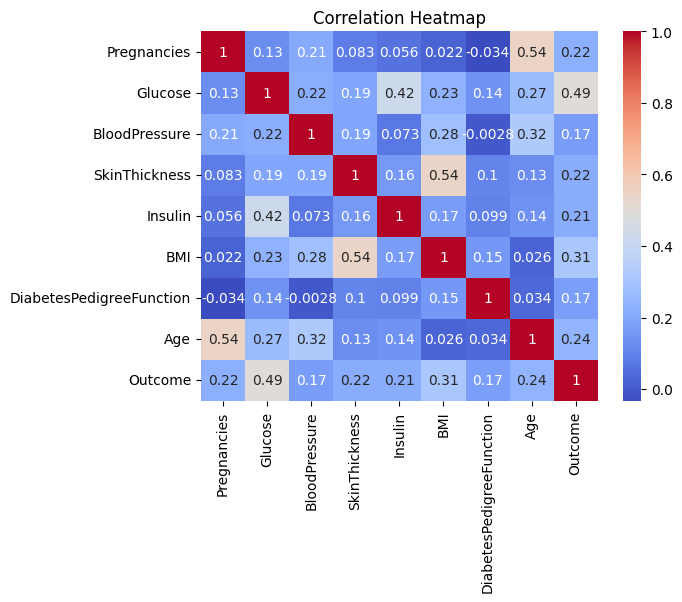

In [51]:
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

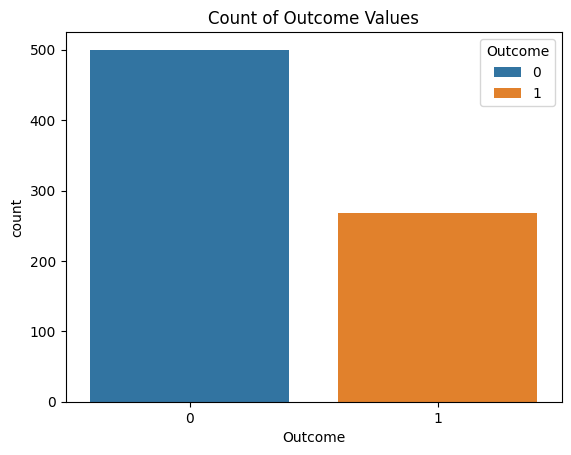

In [53]:
sns.countplot(x='Outcome', data=data , hue='Outcome')
plt.title('Count of Outcome Values')
plt.show()

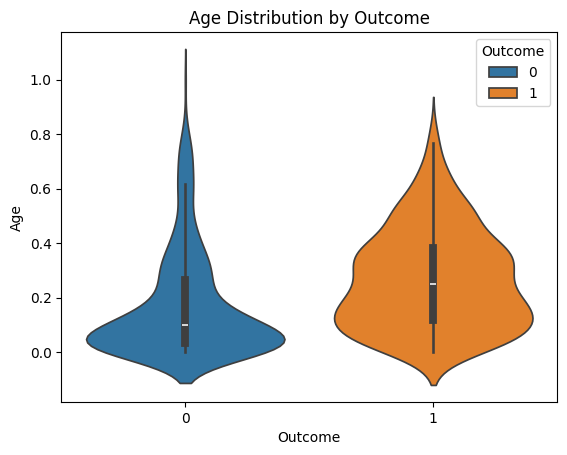

In [55]:
sns.violinplot(x='Outcome', y='Age', data=data , hue='Outcome')
plt.title('Age Distribution by Outcome')
plt.show()

<font size="3">Scaling Data</font>

In [18]:
scaler = MinMaxScaler()
data.iloc[:,:-1] = scaler.fit_transform(data.iloc[:,:-1])

<font size="3">Class wheights</font>

In [19]:
np.unique(data['Outcome'] , return_counts = True)

(array([0, 1], dtype=int64), array([500, 268], dtype=int64))

<font size="3">Drop Outlier data</font>

In [20]:
lof = LocalOutlierFactor()
y_pred = lof.fit_predict(data)

In [21]:
len(y_pred[y_pred == -1])

24

In [22]:
# convert y outlier prediction to 0 and 1
y_pred[y_pred == 1] = 0 
y_pred[y_pred == -1] = 1

In [23]:
# filtering
df = data[y_pred==0]

In [24]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.170130,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.239130,0.170130,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.240798,0.170130,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0
5,0.294118,0.464516,0.510204,0.240798,0.170130,0.151329,0.052519,0.150000,0


<font size="3">Splitting Data into Training and Testing Sets

We split the dataset into training and testing sets using a fixed random seed for reproducibility.</font>

In [25]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

<font size="3">Balance data with Smotetomek</font>

In [26]:
sm = SMOTETomek(sampling_strategy='minority', random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)
X_sm.shape, y_sm.shape

((918, 8), (918,))

<font size="3">Use catboostclassifier to predict diabetes</font>

In [27]:
x_train , x_test , y_train , y_test = train_test_split(X_sm , y_sm , test_size = 0.3 , random_state = 42 )
cat = CatBoostClassifier(learning_rate=0.05, depth=5, iterations=1000 ,task_type='GPU' , eval_metric='Recall' ,random_seed=42)
cat.fit(x_train , y_train , eval_set=(x_test , y_test))

0:	learn: 0.6573209	test: 0.5942029	best: 0.5942029 (0)	total: 104ms	remaining: 1m 43s
1:	learn: 0.8629283	test: 0.7681159	best: 0.7681159 (1)	total: 125ms	remaining: 1m 2s
2:	learn: 0.7663551	test: 0.7101449	best: 0.7681159 (1)	total: 152ms	remaining: 50.4s
3:	learn: 0.7757009	test: 0.7173913	best: 0.7681159 (1)	total: 173ms	remaining: 43s
4:	learn: 0.7663551	test: 0.7246377	best: 0.7681159 (1)	total: 192ms	remaining: 38.2s
5:	learn: 0.8099688	test: 0.7536232	best: 0.7681159 (1)	total: 215ms	remaining: 35.6s
6:	learn: 0.8566978	test: 0.7753623	best: 0.7753623 (6)	total: 239ms	remaining: 33.9s
7:	learn: 0.8473520	test: 0.7826087	best: 0.7826087 (7)	total: 259ms	remaining: 32.1s
8:	learn: 0.8473520	test: 0.7536232	best: 0.7826087 (7)	total: 279ms	remaining: 30.7s
9:	learn: 0.8566978	test: 0.7681159	best: 0.7826087 (7)	total: 300ms	remaining: 29.7s
10:	learn: 0.8411215	test: 0.7681159	best: 0.7826087 (7)	total: 323ms	remaining: 29s
11:	learn: 0.8473520	test: 0.7681159	best: 0.7826087 (7)

<font size="3">Train data accuracy with catboost model</font>

In [28]:
y_pred = cat.predict(x_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       321
           1       0.90      0.95      0.92       321

    accuracy                           0.92       642
   macro avg       0.92      0.92      0.92       642
weighted avg       0.92      0.92      0.92       642



<font size="3">Test data accuracy with catboost model</font>

In [29]:
y_pred = cat.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       138
           1       0.84      0.86      0.85       138

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



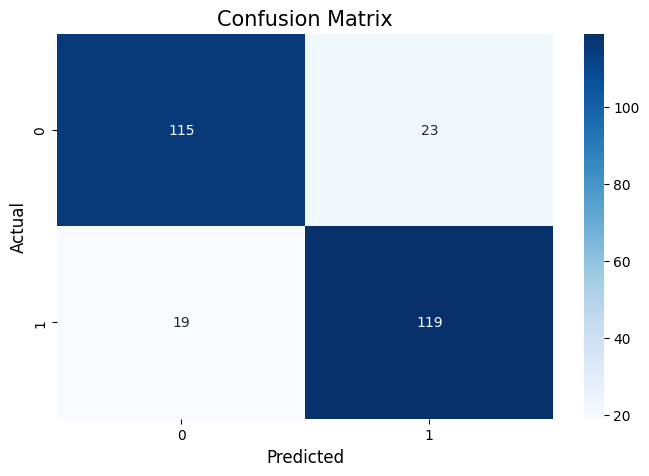

In [30]:
cm = confusion_matrix(y_test , y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True, fmt='d' , cmap='Blues')
plt.xlabel('Predicted' , fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

<font size="3">Visualize Importance:

 Plot the feature importance</font>

Text(0.5, 1.0, 'feature importance in Catboost model')

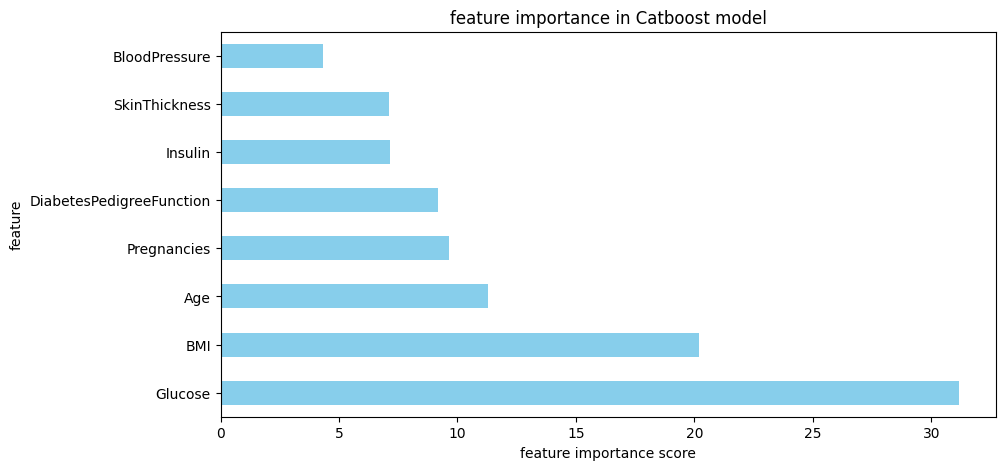

In [31]:
x_train = pd.DataFrame(x_train)
feature_importances = pd.Series(cat.feature_importances_ , index=x_train.columns)
feature_importances.sort_values(ascending=False).plot(kind='barh', color = 'skyblue', figsize=(10, 5))
plt.xlabel('feature importance score')
plt.ylabel('feature')
plt.title('feature importance in Catboost model')

<font size="3">Try  ensembling with catboost and randomforest

Two models are trained: a Random Forest classifier, known for its resistance to overfitting and interpretability, and a CatBoost classifier, which excels in handling categorical data and training efficiency. Each model is fitted to the training data, and predictions are made on the test set.
Final predictions are obtained through a majority voting mechanism that combines the outputs of both models, aiming to improve overall performance by addressing the weaknesses of each individual approach.</font>

In [32]:
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.05, depth=12, loss_function='Logloss' ,  eval_metric='Recall' ,task_type='GPU' , random_state=42)
rf_model = RandomForestClassifier(n_estimators=300,max_depth=12 ,criterion='entropy',   random_state=42 , n_jobs=-1 , verbose=0)

ensemble_model = VotingClassifier(estimators=[('catboost', catboost_model), ('rf', rf_model)], voting='soft' , n_jobs=-1)
ensemble_model.fit(x_train, y_train)

VotingClassifier(estimators=[('catboost',
                              <catboost.core.CatBoostClassifier object at 0x0000026E398D98E0>),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=12,
                                                     n_estimators=300,
                                                     n_jobs=-1,
                                                     random_state=42))],
                 n_jobs=-1, voting='soft')

<font size="3">Train data accuracy with ensemble model</font>

In [33]:
y_pred = ensemble_model.predict(x_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       321
           1       1.00      1.00      1.00       321

    accuracy                           1.00       642
   macro avg       1.00      1.00      1.00       642
weighted avg       1.00      1.00      1.00       642



<font size="3">Test data accuracy with ensemble model</font>


In [34]:
y_pred = ensemble_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       138
           1       0.84      0.86      0.85       138

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



<font size="3">confusion_matrix</font>

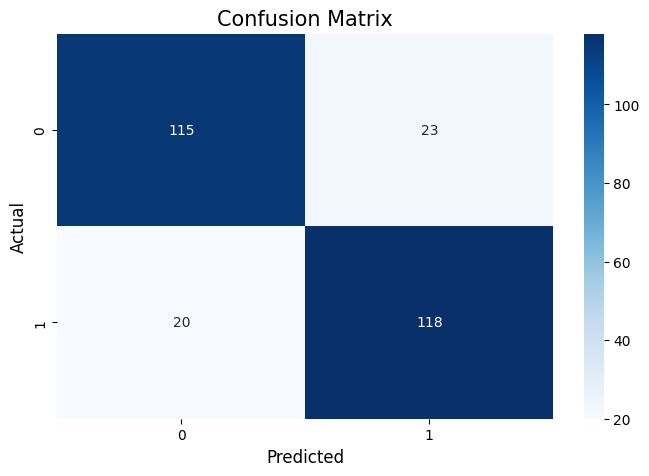

In [35]:
cm = confusion_matrix(y_test , y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True, fmt='d' , cmap='Blues')
plt.xlabel('Predicted' , fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

<font size="3">cross validation on ensemble model</font>


In [36]:
from sklearn.model_selection import cross_val_score
import numpy as np
# cross validation on ensemble model
cross_val_scores = cross_val_score(ensemble_model, x_train, y_train, cv=5, scoring='accuracy')

# print results
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Mean cross-validation score: {np.mean(cross_val_scores)}")

Cross-validation scores: [0.74418605 0.73643411 0.84375    0.84375    0.8984375 ]
Mean cross-validation score: 0.8133115310077519


<font size="3">Use deep learning to predict diabetes</font>


In [37]:
model = Sequential()
model.add(Dense(32 , activation='relu' , input_shape = (8,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train , y_train , epochs=500 , batch_size=50 , validation_data=(x_test , y_test))

Epoch 1/500
13/13 [==============================] - 4s 45ms/step - loss: 0.6757 - accuracy: 0.5405 - val_loss: 0.6639 - val_accuracy: 0.5652
Epoch 2/500
13/13 [==============================] - 0s 10ms/step - loss: 0.6625 - accuracy: 0.5794 - val_loss: 0.6429 - val_accuracy: 0.6377
Epoch 3/500
13/13 [==============================] - 0s 9ms/step - loss: 0.6401 - accuracy: 0.6760 - val_loss: 0.6181 - val_accuracy: 0.7174
Epoch 4/500
13/13 [==============================] - 0s 9ms/step - loss: 0.6165 - accuracy: 0.6916 - val_loss: 0.5884 - val_accuracy: 0.7681
Epoch 5/500
13/13 [==============================] - 0s 10ms/step - loss: 0.5919 - accuracy: 0.7165 - val_loss: 0.5598 - val_accuracy: 0.7645
Epoch 6/500
13/13 [==============================] - 0s 15ms/step - loss: 0.5589 - accuracy: 0.7290 - val_loss: 0.5342 - val_accuracy: 0.7645
Epoch 7/500
13/13 [==============================] - 0s 16ms/step - loss: 0.5471 - accuracy: 0.7336 - val_loss: 0.5153 - val_accuracy: 0.7826
Epoch 8/

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 10849 (42.38 KB)
Trainable params: 10849 (

In [43]:
y_pred = model.predict(x_train)
y_pred = (y_pred > 0.5)

print(classification_report(y_train, y_pred))

21/21 [==============================] - 0s 874us/step
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       321
           1       0.95      0.99      0.97       321

    accuracy                           0.97       642
   macro avg       0.97      0.97      0.97       642
weighted avg       0.97      0.97      0.97       642



In [44]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
print(classification_report(y_test, y_pred))

9/9 [==============================] - 0s 0s/step
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       138
           1       0.83      0.88      0.85       138

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



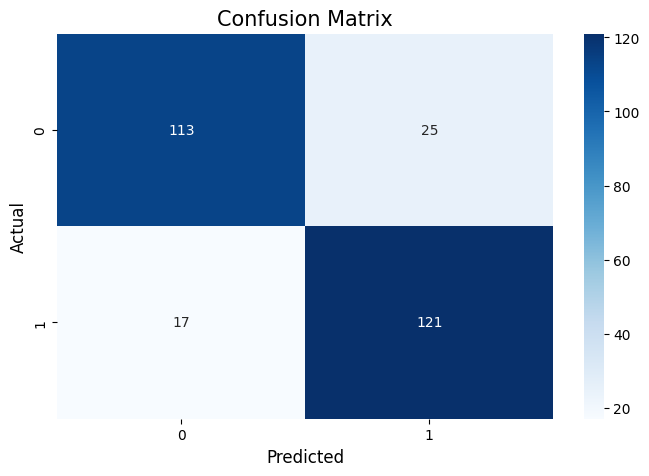

In [45]:
cm = confusion_matrix(y_test , y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True, fmt='d' , cmap='Blues')
plt.xlabel('Predicted' , fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

In [46]:
with open("Final_Diabetes_catboost_model.txt","wb") as f:
    pickle.dump(cat,f)
with open("Final_Diabetes_ensemble_model.txt","wb") as f:
    pickle.dump(ensemble_model,f)
with open("scale.txt","wb") as f:
    pickle.dump(scaler,f)